# Music Popularity Prediction

# Introduction


We all know how music is addictive and how it has become a part of our busy lives. Stats say, on average, Americans spend 32.5 hours per week listening to music. That's roughly 4 hours 50 minutes a day. Everyone wants better song/music to listen everyday. There is a gap where sometimes people don't often get the songs they need or want it.

I am now going to predict the popularity of a song/music using different Machine Learning techniques and shall finalize which model is better in classifying the song popularity.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
#sns.color_palette('pastel', as_cmap=True)

In [2]:
df = pd.read_csv("data.csv")
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


The dataset consists of 12227 rows and 17 columns. That is, it has a record of 232,725 songs (Each row is a music track)

In [51]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'No'

In [3]:
df.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity'],
      dtype='object')

1: acousticness: The acousticity of the track (technical in terms of music). This ranges from 0-1
2: danceability: The ability to dance for this particular track. This also ranges from 0-1
3: duration_min: The duration the track in minutes
4: energy: The energy of a song - the higher the value, the more energtic the song. This ranges from 0-1
5: instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is, ranges from 0-1
6: key: It is a group of pitches. A categorical variable with multiple categores
7: liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”. Ranges from 0-1
8: loudness: The loudness of the music track. It is a continous variable
9: mode: The mode of the track. It might be a 'major' mode or 'minor' mode
10: speechiness: Speechiness detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech
11: tempo: the speed at which a passage of music is played. This is a continuous variable and ranging from 30 -243
12:valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
Now let's look at how data looks like

In [4]:
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


# Exploratory Data Analysis

Let's look at if any missing values are present

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   danceability      12227 non-null  float64
 3   energy            12227 non-null  float64
 4   explicit          12227 non-null  object 
 5   instrumentalness  12227 non-null  float64
 6   key               12227 non-null  int64  
 7   liveness          12227 non-null  float64
 8   loudness          12227 non-null  float64
 9   mode              12227 non-null  object 
 10  release_date      12227 non-null  object 
 11  speechiness       12227 non-null  float64
 12  tempo             12227 non-null  float64
 13  valence           12227 non-null  float64
 14  year              12227 non-null  int64  
 15  duration-min      12227 non-null  float64
 16  popularity        12227 non-null  object

We see that there are no NaN values in our dataset. There are 12227 entries for all the columns. Trying with describe() function

In [6]:
df.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


Seems like there are no missing values in the dataset. Because, there no NaN values as well as all the minimum values and maximum values are according to the standards. But there are some fields that needs to be clean Let's look at the columns one by one and analyse them to see if anything needs to be imputed or cleaned

In [7]:
print(df.shape)

(12227, 17)


In [8]:
df.isnull().sum()

id                  0
acousticness        0
danceability        0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration-min        0
popularity          0
dtype: int64

Acousticness

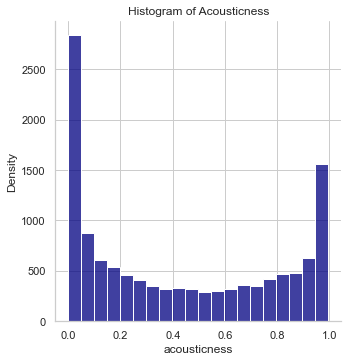

In [9]:



import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['acousticness'], bins = 20, color = 'navy')
plt.title('Histogram of Acousticness')
plt.ylabel('Density')
plt.show()

1: Acousticness is a value from 0-1.
Let's look at boxplot of acousticness

Text(0.5, 1.0, 'Boxplot of Acousticness')

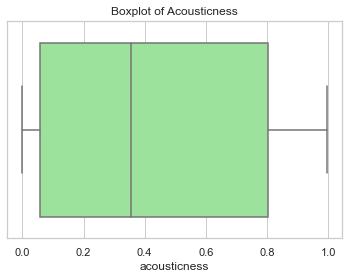

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['acousticness'], color = 'lightgreen')
plt.title('Boxplot of Acousticness')

1:The mean of Acousticness lies between 0.3-0.4
2:The first and third quadrant are respectively 0.05 and 0.8
3: There are no outliers in the acousticness

<AxesSubplot:xlabel='popularity', ylabel='acousticness'>

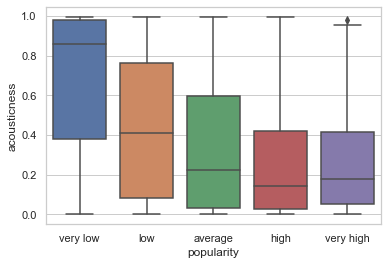

In [11]:
sns.boxplot(x = df['popularity'],y= df['acousticness'])

# Danceability

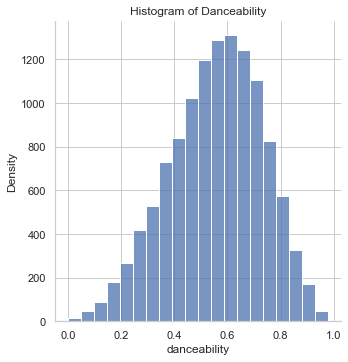

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['danceability'], bins = 20)
plt.title('Histogram of Danceability')
plt.ylabel('Density')
plt.show()

The distribution almost looks a normal distribution which is a good sign

Text(0.5, 1.0, 'Boxplot of Danceability')

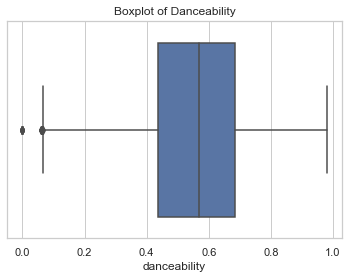

In [13]:
#boxplot of danceability
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['danceability'])
plt.title('Boxplot of Danceability')

The mean of Danceability lies between 0.55-0.6.

There are no outliers in danceability.


<AxesSubplot:xlabel='popularity', ylabel='danceability'>

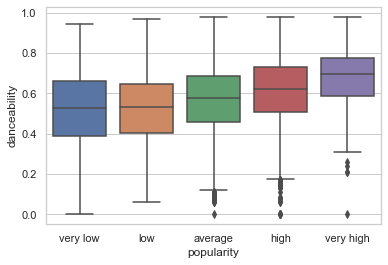

In [14]:
sns.boxplot(x = df['popularity'],y= df['danceability'])

# Energy

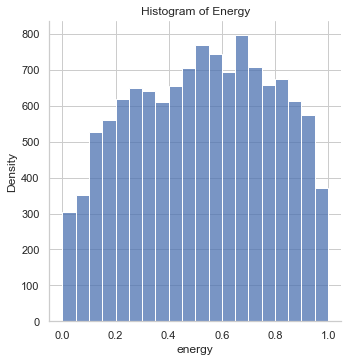

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['energy'], bins = 20)
plt.title('Histogram of Energy')
plt.ylabel('Density')
plt.show()

1: Energy is a continuous variable which ranges from 0-1

2: The distribution looks like above. Maximum number of values ranging from 0.6-0.8

3: It is a left skewed distribution.

Let's look at the boxplot of Energy

<AxesSubplot:xlabel='popularity', ylabel='energy'>

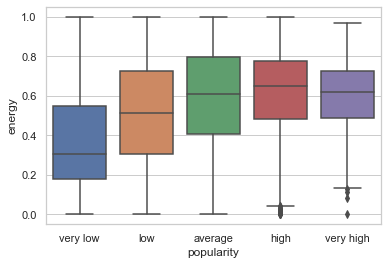

In [16]:
sns.boxplot(x = df['popularity'],y= df['energy'])

Text(0.5, 1.0, 'Boxplot of Energy')

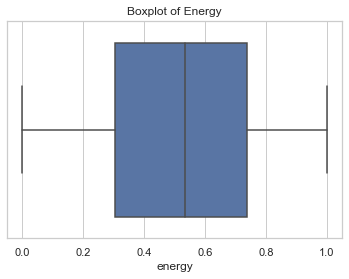

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['energy'])
plt.title('Boxplot of Energy')

1: The mean of 'energy' is 0.6
    
2: The first and third quartiles of the energy data are 0.4 and 0.8 respectively.

3:By this, we can say that we have more energetic songs in the data. (As mentioned above, higher the energy value, higher the energy of the song)

# Instrumentalness

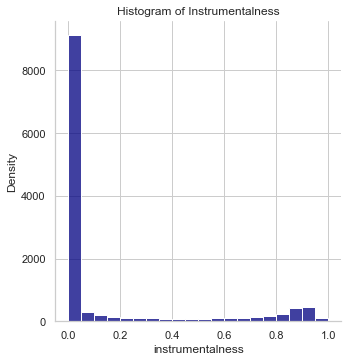

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['instrumentalness'], bins = 20, color = 'navy')
plt.title('Histogram of Instrumentalness')
plt.ylabel('Density')
plt.show()


Text(0.5, 1.0, 'Boxplot of instrumentalness')

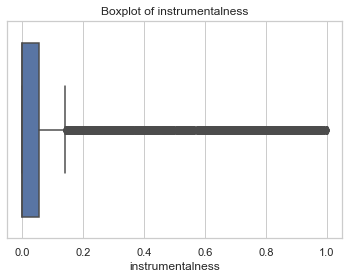

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['instrumentalness'])
plt.title('Boxplot of instrumentalness')


# 1: Completely right skewed data as we see that most of the values lie in the first bar.

2: Instrumentalness can be defined as: closer the value tends to 1, the more number of vocals are present in the track. So here, as so many of the values are closer to 0 than 1, we can say that major part of the songs are not with vocals but only music.

3: The box plot of instrumentalness also looks in a similar manner as a complete right skewed distribution

# Liveness

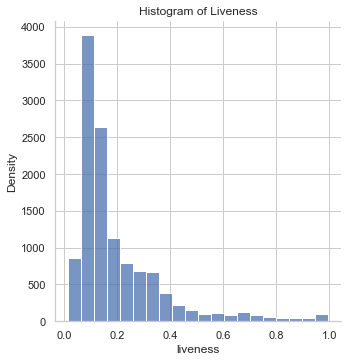

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['liveness'], bins = 20)
plt.title('Histogram of Liveness')
plt.ylabel('Density')
plt.show()

1: Right skewed distribution

2: As per the definition, if the value is more than 0.8, then it was said to be recorded live.

3: Seems like there aren't much live recorded music tracks in the database

Let's look at the boxplot of Liveness

Text(0.5, 1.0, 'Boxplot of Liveness')

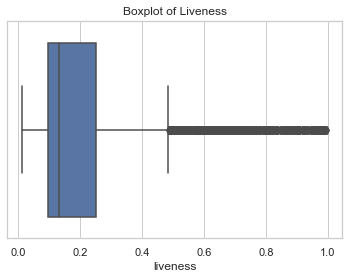

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['liveness'])
plt.title('Boxplot of Liveness')

1: The boxplot shows that the mean of liveness is in between 0.1 and 0.2
    
2: It also tells that any value greater than 0.5 is an outlier.
    
3: This means that there a very few data points which are recorded live and they are outliers.

# Loudness

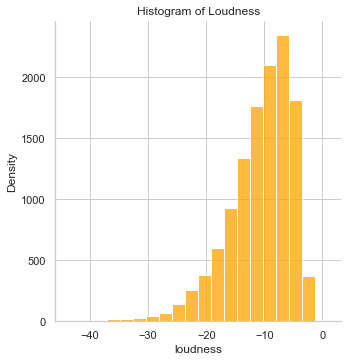

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['loudness'], bins = 20, color = 'orange')
plt.title('Histogram of Loudness')
plt.ylabel('Density')
plt.show()

1: Left skewed distribution
    
2: Higher the value (more the value tends to 0, higher the loudness of the song)
Most of the values lie from -10 to 0 which says that most of the songs are loud in nature

3: Let's compare the relationship between loudness and popularity by using jointplot

# Speechiness

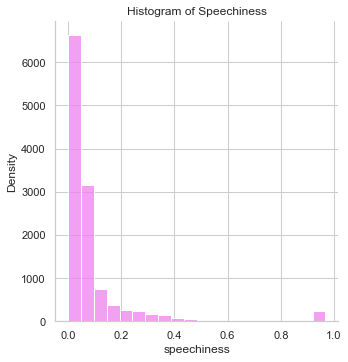

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['speechiness'], bins = 20, color = 'violet')
plt.title('Histogram of Speechiness')
plt.ylabel('Density')
plt.show()

1: Right skewed Distribution
    
2: As the definition says, if the speechiness is less than 0.33, then the track doesn't have any vocals. In the data, we have more tracks which don't have any vocals

3: We see some outliers at 0.9 speechiness which are probably rap songs

# Tempo

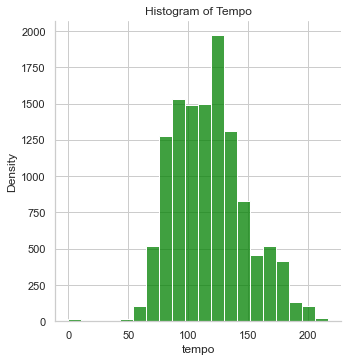

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['tempo'], bins = 20, color = 'green')
plt.title('Histogram of Tempo')
plt.ylabel('Density')
plt.show()

1: Tempo is defined as the speed at which the passage of the music is playing

2:It is a continuous variable which ranges from 30 to 243

3:It is almost a bimodal distribution with values from 70-100 and 12-140 as modes

Let's look at the boxplot of tempo

Text(0.5, 1.0, 'Boxplot of Tempo')

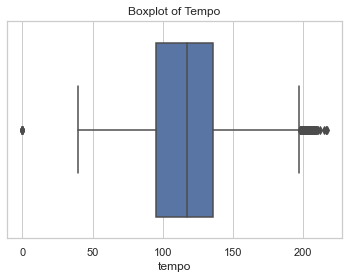

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tempo'])
plt.title('Boxplot of Tempo')


1:The mean of Tempo lies between 110 - 120
    
2: There are outliers to the right of the distribution.
All the values after 205 are outliers

<AxesSubplot:xlabel='popularity', ylabel='tempo'>

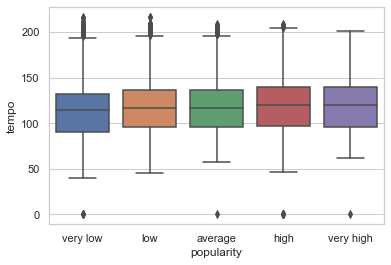

In [25]:
sns.boxplot(x = df['popularity'],y= df['tempo'])

# Valence

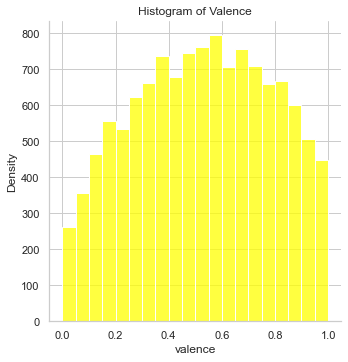

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['valence'], bins = 20, color = 'yellow')
plt.title('Histogram of Valence')
plt.ylabel('Density')
plt.show()


1:Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

2: We see that we have more happy, cheerful and euphoric tracks than the sad, depressed and angry tracks

# Year

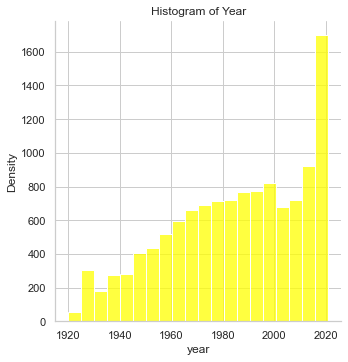

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.displot(df['year'], bins = 20, color = 'yellow')
plt.title('Histogram of Year')
plt.ylabel('Density')
plt.show()


<AxesSubplot:xlabel='popularity', ylabel='year'>

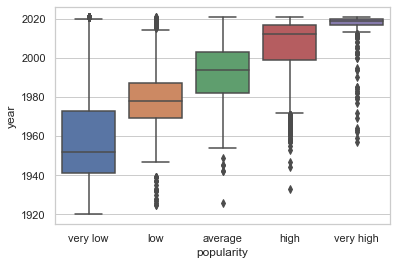

In [28]:
sns.boxplot(x = df['popularity'],y= df['year'])

# Correlation Matrix

<AxesSubplot:>

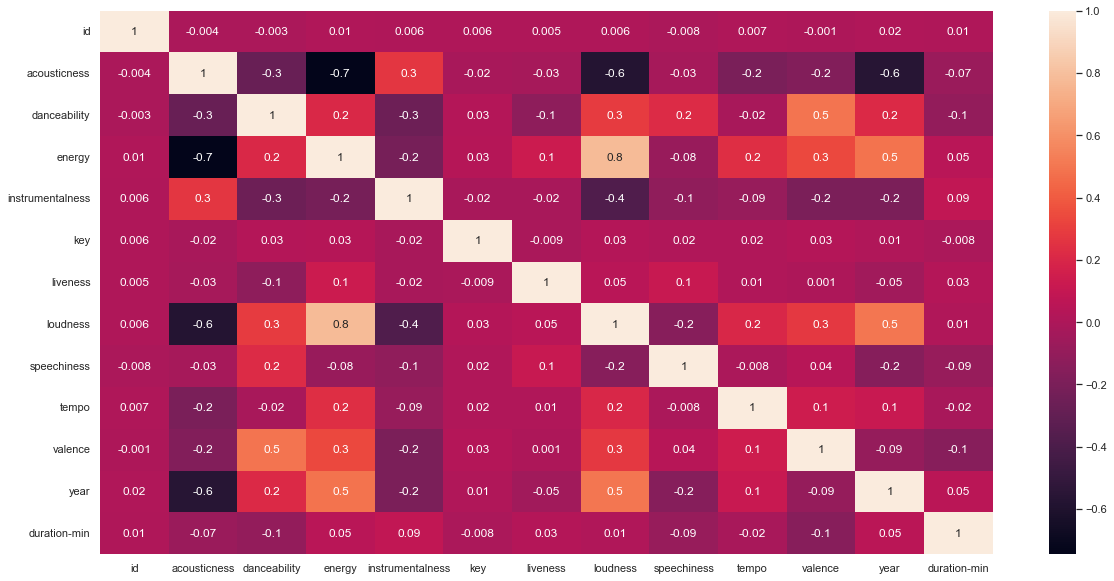

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g',square=False)

Positive correlation between year & popularity , loudness & energy
Negative correlation between energy & acousticness , loudness & acousticness

# Encoding of popularity column

In [30]:
#Mapping the different labels to different integers
popularity_map = {'very low':"Not popular",'low':"Not popular",'average':"average",'high':"average",'very high':"most popular"}
df['popularity'] = df['popularity'].map(popularity_map)
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,Not popular
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,Not popular
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,Not popular
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,Not popular
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [31]:
df['popularity'].unique()

array(['Not popular', 'average', 'most popular'], dtype=object)

In [32]:
#Mapping the different labels to different integers
popularity_map = {'Not popular':0,'average':1,'most popular':2}
df['popularity'] = df['popularity'].map(popularity_map)
df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,0
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,0
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,0
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,0
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,1


In [33]:
df["popularity"]

0        0
1        0
2        0
3        0
4        1
        ..
12222    1
12223    2
12224    0
12225    1
12226    1
Name: popularity, Length: 12227, dtype: int64

In [34]:
df["popularity"].value_counts()

0    6340
1    5518
2     369
Name: popularity, dtype: int64

In [35]:
#Mapping the different labels to different integers
explicit_map = {'No':0,'Yes':1,}
df['explicit'] = df['explicit'].map(explicit_map)

In [36]:
#Mapping the different labels to different integers
mode_map = {'Minor':0,'Major':1,}
df['mode'] = df['mode'].map(mode_map)

In [37]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
12222    0
12223    0
12224    0
12225    0
12226    1
Name: explicit, Length: 12227, dtype: int64

In [38]:
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.03980,1947,3.0,0
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.85900,2020,2.4,0
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.70900,1950,2.6,0
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.96400,1974,2.4,0
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.78500,1973,3.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,-5.461,1,01-07-2014,0.4070,81.940,0.74400,2014,3.4,1
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,-14.014,1,01-01-1959,0.0351,134.009,0.70100,1959,2.0,2
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,-9.298,0,01-01-1984,0.0338,124.883,0.89000,1984,2.5,0
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,-26.324,1,09-01-2017,0.1180,73.234,0.00558,2017,3.1,1


In [39]:
# Dropping unecessary features

data = df.drop(labels=['id', 'release_date'], axis=1)
data.shape

(12227, 15)

In [40]:
# Check for missing data

data.isna().sum().sum()
0
# Check for duplicates

0

In [41]:
# Check for duplicates

data.duplicated().sum()

29

In [42]:
# Remove duplicates

data = df[~df.duplicated()==1]
data.shape


(12227, 17)

# Data Preprocessing

First, we import a clean version of the data, without id, and release_date and remove the duplicates.

In [43]:
# Read column names from file

cols = list(pd.read_csv("data.csv", nrows =1))
df = pd.read_csv("data.csv", usecols=[i for i in cols if i not in ['id','release_date']])

# Remove duplicated
df = df[~df.duplicated()==1]
# df = df.sample(frac=0.3)

# Feature selection 

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#Selecting features based on correlation matrix
X = df[["acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","year","duration-min","explicit","key","mode"]]
Y = df["popularity"]

In [46]:
##Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

After exploring the data, some features need pre-processing. This will be done in the following order:

1: Unique feature transformers: Here we need to replace object data of the artists with some numerical indicator that identify the artist.

2: OneHotEncoder for relevant features : We use OneHotEncoder from SKlearn to create dummies

3: inMaxScaling for relevant features

4: Target scaling

In [47]:
X_train.head(3)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,duration-min,explicit,key,mode
5227,0.00272,0.545,0.919,0.00511,0.0977,-7.679,0.0484,104.366,0.387,1989,5.2,No,2,Major
9607,0.08890,0.790,0.777,0.00112,0.1410,-8.752,0.3390,160.013,0.421,2019,1.6,No,2,Major
8080,0.19100,0.807,0.786,0.00000,0.1010,-6.404,0.3630,87.944,0.726,2001,4.4,Yes,1,Minor


In [48]:
y_train.describe()

count         9762
unique           5
top       very low
freq          2560
Name: popularity, dtype: object

# MOdel

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
predictions = classifier.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("Logistic Regression")
print(accuracy_score(y_train,predictions))
print(f1_score(y_train,predictions,average = 'weighted'))
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

In [ ]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
print(classifier)

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
predictions = classifier.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("Decision Tree")
print(accuracy_score(y_train,predictions))
print(f1_score(y_train,predictions,average = 'weighted'))
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

he accuracy of the decision tree classifier model after imputing missing values is 24.09%
There is just 0.31% increase in accuracy of the model
Hence, the missing value treatment using "mean" technique didn't help that much but it helped to a very low extent

Now let's dig into the Random Forest Model if that can increase accuracy of predicting the popularity of the track

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 944,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True,random_state = 14)
classifier.fit(X_train,y_train)

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
predictions = classifier.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("Random Forest")
print(accuracy_score(y_train,predictions))
print(f1_score(y_train,predictions,average = 'weighted'))
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)

In [ ]:
classifier.score(X_test,y_test)


In [ ]:
predictions = classifier.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("Random Forest")
print(accuracy_score(y_train,predictions))
print(f1_score(y_train,predictions,average = 'weighted'))
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

# FINAL MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
predictions = classifier.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("GradientBoostingClassifier")
print(accuracy_score(y_train,predictions))
print(f1_score(y_train,predictions,average = 'weighted'))
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))

In [ ]:
X.iloc[53:54,:].values

In [ ]:
#creating input data set to predict output.
arr2 = [0.427, 0.679, 0.443, 0.0, 0.106, -8.528, 0.153, 104.049, 0.363,2019, 3.0, 1, 10, 0]
arr3 = np.array(arr2)

In [ ]:
def very_low():
    return "very low"
def low():
    return "low"
def average():
    return "average"
def high():
    return "high"
def very_high():
    return "very high"
def default():
    return "Incorrect"

switcher = {
    0: very_low,
    1: low,
    2: average,
    3: high,
    4: very_high,
    }

def switch(results):
    return switcher.get(results, default)()




In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.classification import *


In [ ]:
data = df[["id","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","year","duration-min","explicit","key","mode","popularity"]]


In [ ]:
df1 = pd.read_csv("data.csv")


In [ ]:
df1.columns

In [ ]:
s = setup(df, target = 'popularity')
best = compare_models()

In [ ]:
evaluate_model(best)


In [ ]:
plot_model(best, plot = 'auc')|

In [ ]:
plot_model(best, plot = 'confusion_matrix')

In [ ]:
predict_model(best)

In [ ]:
predictions = predict_model(best, data=df1)
predictions.head()

In [ ]:
df['release_date'].unique()